https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

https://towardsdatascience.com/id3-decision-tree-classifier-from-scratch-in-python-b38ef145fd90

https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

# Question 1

In [218]:
import pandas as pd
import numpy as np
from math import log2
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
%cd drive/MyDrive/CS760/HW2/data

/content/drive/MyDrive/CS760/HW2/data


In [4]:
D1 = pd.read_csv('data/D1.txt', header = None, sep=" ")

In [4]:
D1.head(3)

,0,1,2
0,0.264185,0.178456,0
1,0.409499,0.213456,1
2,0.926224,0.540329,1


In [34]:
def get_entropy(class0, class1):
    if class0 == 0:
        part1 = 0
    else:
        part1 = class0 * log2(class0)

    if class1 == 0:
        part2 = 0
    else:
        part2 = class1 * log2(class1)
    return -part1-part2

In [220]:
def compute_ig(c,df,col):
    left = df[df[col]<c]
    right = df[df[col]>=c]

    # left split
    class0_left=len(left[left[2]==0])/len(left)
    class1_left=len(left[left[2]==1])/len(left)

    entropy_left = get_entropy(class0_left,class1_left)

    # right split
    class0_right=len(right[right[2]==0])/len(right)
    class1_right=len(right[right[2]==1])/len(right)

    entropy_right = get_entropy(class0_right,class1_right)

    HY = get_entropy(len(df[df[2]==0])/len(df),len(df[df[2]==1])/len(df))
    total_entropy = len(left)/len(df)*entropy_left + len(right)/len(df)*entropy_right
    IG = HY - total_entropy

    return total_entropy, IG, left, right

In [232]:
def best_split(df, features):
    #class_values = list(set(row[-1] for row in df))
    left = df.copy()
    right = pd.DataFrame(columns = [0, 1, 2])
    best_c, best_col, best_ig, best_entropy, best_groups = 0, 0, -1000, 1, [left, right]
    #print('new split')
    for col in features:
        # iterate through indices of current dataframe
        c_values = list(df[col].unique())
        c_values.sort()
        for c in c_values[1:]: # skip last value as that would results in an empty split
            total_entropy, ig, left, right = compute_ig(c,df,col)
            #print(c, col, total_entropy, ig)
            # if any entropy is 0, return best split
            if total_entropy == 0:
                return {'c': c, 'col': col, 'best_gain': best_ig, 'best_entropy': 0, 'groups': [left, right]}

            # if information gain is higher, update best values
            if ig > best_ig:
                best_c, best_ig, best_col, best_groups = c, ig, col, [left, right]
    return {'c': best_c, 'col': best_col, 'best_gain': best_ig, 'best_entropy': best_entropy,
          'groups': best_groups}

In [28]:
def pred_leaf(group):
    mode = group[2].mode()

    # if mode is a tie, predict 1
    if len(mode) == 2:
        pred = 1
    # otherwise, predict the most popular (mode) of the group
    else:
        pred = int(mode)
    return pred

In [57]:
def split(node):
    #print('node', node)
    left, right = node['groups']

    del(node['groups'])

  # if any entropy is 0, make two children and terminate
    if node['best_entropy'] == 0:
    #print('zero entropy')
        if len(right) == 0:
            node['pred'] = pred_leaf(left)
        else:
            # make left and right child nodes
            node['left'] = {}
            node['right'] = {}
            node['left']['pred']= pred_leaf(left)
            node['right']['pred'] = pred_leaf(right)
            return

  # check node is empty
    if len(left) == 0 or len(right) == 0:
        #print('return one empty')
        node['pred'] = pred_leaf(left.append(right))
        return

  # if all splits have zero gain ratio
    if node['best_gain'] == 0:
        #print('zero gain')
        node['pred'] = pred_leaf(left.append(right))
        return
  


  # left child
    if len(left) == 1:
        node['left'] = {}
        node['left']['pred'] = pred_leaf(left)
        return
    else:
        node['left'] = best_split(left, [0,1])
        split(node['left'])

  # right child
    if len(right) == 1:
        node['right'] = {}
        node['right']['pred'] = pred_leaf(right)
        return
    else:
        node['right'] = best_split(right, [0,1])
        split(node['right'])

In [32]:
def decision_tree(df):
    root = best_split(df, [0,1])
    split(root)
    return root

In [11]:
tree = decision_tree(D1)

In [12]:
tree

{'c': 0.199558,
 'col': 1,
 'best_gain': 0.6578840156989677,
 'best_entropy': 0,
 'left': {'pred': 0},
 'right': {'pred': 1}}

In [14]:
check_left = D1[D1[1]<=0.199725]

In [15]:
check_right = D1[D1[1]>0.199725]

In [16]:
check_left[2].unique()

array([0])

In [17]:
check_right[2].unique()

array([1])

# 2 Questions

## 2.1

## 2.2 Our algorithm is greedy

In [27]:
df=pd.DataFrame({'feature':[1,0,0,1], 2 :[0,1,0,1]})

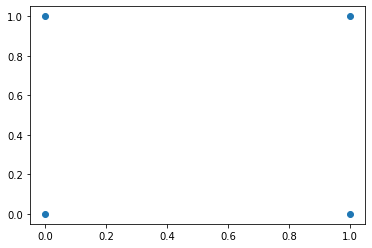

In [30]:
plt.scatter(df['feature'], df[2])

## 2.3 Gain ratio exercise

In [66]:
druns = pd.read_csv('data/Druns.txt', sep=' ', header = None)

In [219]:
druns[0].unique()

array([0.1, 0. ])

In [223]:
tree_druns = decision_tree(druns)

0.1 0 0.8011735447551751 0.04417739186726144
-1 1 0.8011735447551751 0.04417739186726144
0 1 0.807076414416144 0.03827452220629257
1 1 0.8404647725305937 0.004886164091842837
2 1 0.8442687707093589 0.0010821659130776373
3 1 0.8290377707967044 0.016313165825732168
4 1 0.7958988638330424 0.04945207278939412
5 1 0.7401554045523902 0.1051955320700464
6 1 0.6457639134327491 0.19958702318968746
7 1 0.807076414416144 0.03827452220629257
8 1 0.6562982680794203 0.18905266854301628
0.1 0 0.5177136812595365 0.025850761940059863
-1 1 0.5177136812595365 0.025850761940059863
0 1 0.25 0.2935644431995964
1 1 0.3443609377704336 0.19920350542916282
2 1 0.4056390622295664 0.13792538097003
3 1 0.4512050593046014 0.09235938389499498
4 1 0.4875168162362656 0.05604762696333082
5 1 0.5177136812595365 0.025850761940059863
0.1 0 0.0 1.0
1 1 -0.0 0.0
7 1 0.6666666666666666 0.2516291673878229
8 1 0.6666666666666666 0.2516291673878229


In [68]:
tree_druns

{'c': 5,
 'col': 1,
 'best_gain': 0.19958702318968746,
 'best_entropy': 1,
 'left': {'c': -1,
  'col': 1,
  'best_gain': 0.2935644431995964,
  'best_entropy': 1,
  'left': {'c': -2,
   'col': 1,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 0},
   'right': {'pred': 1}},
  'right': {'c': 0,
   'col': 1,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 0},
   'right': {'pred': 0}}},
 'right': {'c': 6,
  'col': 1,
  'best_gain': 0.2516291673878229,
  'best_entropy': 1,
  'left': {'pred': 1}}}

## 2.4 Interpretability

In [226]:
D3 = pd.read_csv('data/D3leaves.txt', sep=' ', header = None)

In [227]:
D3

,0,1,2
0,10,1,1
1,10,2,1
2,10,3,1
3,1,1,0
4,1,3,1


In [228]:
tree_D3 = decision_tree(D3)

10 0 0.4 0.3219280948873623
2 1 0.4 0.3219280948873623
3 1 0.5509775004326937 0.17095059445466865
3 1 0.0 1.0
2 1 0.0 0.0


In [229]:
tree_D3

{'c': 10,
 'col': 0,
 'best_gain': 0.3219280948873623,
 'best_entropy': 1,
 'left': {'c': 3,
  'col': 1,
  'best_gain': -1000,
  'best_entropy': 0,
  'left': {'pred': 0},
  'right': {'pred': 1}},
 'right': {'c': 2,
  'col': 1,
  'best_gain': -1000,
  'best_entropy': 0,
  'left': {'pred': 1},
  'right': {'pred': 1}}}

## 2.5 Or is it

In [230]:
tree_D1 = decision_tree(D1)

0.001405 0 0.6687381479549965 0.0002776871015610638
0.001824 0 0.6684601541489306 0.0005556809076270319
0.001943 0 0.6681818529580005 0.0008339820985571178
0.003089 0 0.6679032436995733 0.0011125913569842716
0.005812 0 0.6676243256887329 0.0013915093678247281
0.006173 0 0.6673450982382689 0.001670736818288665
0.007471 0 0.6670655606586672 0.001950274397890417
0.008663 0 0.6667857122580994 0.002230122798458245
0.008861 0 0.6665055523424117 0.002510282714145884
0.009175 0 0.6662250802151162 0.002790754841441423
0.010672 0 0.6659442951773779 0.003071539879179741
0.01079 0 0.6656631965280064 0.003352638528551166
0.010938 0 0.6653817835634438 0.003634051493113799
0.011643 0 0.6651000555777548 0.003915779478802839
0.011844 0 0.6679028148560167 0.0011130202005409373
0.012141 0 0.667718486846696 0.001297348209861604
0.01228 0 0.667527820080516 0.0014880149760415629
0.012936 0 0.6673315238406056 0.001684311215952028
0.01477 0 0.668483442030642 0.0005323930259155674
0.015223 0 0.6683595440479827

0.178046 0 0.6684014089628235 0.0006144260937340773
0.179475 0 0.6683490084894348 0.0006668265671228024
0.181807 0 0.668294660798549 0.0007211742580085501
0.182346 0 0.6682383858857919 0.0007774491707657205
0.18238 0 0.6681802033234897 0.0008356317330678875
0.183275 0 0.6681201322717621 0.0008957027847954491
0.183613 0 0.6680581914892476 0.0009576435673099848
0.184859 0 0.6679943993434779 0.0010214357130796659
0.185012 0 0.6683001154476749 0.0007157196088827256
0.185138 0 0.6682448114551819 0.0007710236013757088
0.186937 0 0.6681876429733147 0.0008281920832429179
0.187835 0 0.6681286278580599 0.0008872071984976637
0.190783 0 0.6680677836020652 0.0009480514544923935
0.191197 0 0.6680051273436899 0.0010107077128677089
0.191498 0 0.6679406758757717 0.001075159180785934
0.192853 0 0.6678744456541166 0.0011413894024410176
0.193268 0 0.6678064528057265 0.0012093822508311147
0.193721 0 0.6681360165964985 0.0008798184600591341
0.195822 0 0.6684102996722043 0.0006055353843532618
0.195872 0 0.66

0.349449 0 0.6690061810336803 9.654022877336743e-06
0.35146 0 0.6690106857316633 5.149324894260232e-06
0.351652 0 0.669013783468024 2.0515885336136463e-06
0.351679 0 0.6690154792977527 3.557588048597182e-07
0.352546 0 0.6690157782018143 5.6854743246681494e-08
0.352784 0 0.6690146850880097 1.1499685479421373e-06
0.353387 0 0.6690122047918214 3.630264736154132e-06
0.353566 0 0.6690083420772448 7.492979312795356e-06
0.354274 0 0.669003101637603 1.2733418954580245e-05
0.354277 0 0.6689964880963468 1.934696021077542e-05
0.354691 0 0.6689885060078404 2.7329048717161797e-05
0.355109 0 0.6689791598581323 3.6675198425317745e-05
0.357304 0 0.6689684540657127 4.738099084489189e-05
0.357809 0 0.6689563929822562 5.944207430141901e-05
0.358269 0 0.6689429808933511 7.285416320645943e-05
0.359769 0 0.6689282220192165 8.761303734106107e-05
0.359956 0 0.668912120515404 0.0001037145411535434
0.360075 0 0.6688946804734892 0.00012115458306838356
0.362395 0 0.6688759059217485 0.00013992913480909142
0.363346

0.514388 0 0.6688296480836553 0.00018618697290229136
0.514807 0 0.6689167846388016 9.90504177560414e-05
0.516619 0 0.6689006009542223 0.00011523410233527098
0.516632 0 0.668883194174517 0.0001326408820405689
0.518152 0 0.6688645643440658 0.00015127071249176893
0.518172 0 0.6688447114712084 0.0001711235853492088
0.518197 0 0.6688236355282569 0.0001921995283007405
0.519526 0 0.668801336451502 0.00021449860505562413
0.520225 0 0.6687778141412194 0.00023802091533819958
0.520302 0 0.6688780705470359 0.0001377645095217428
0.52172 0 0.6688590962286339 0.00015673882792366367
0.521814 0 0.6689378656915441 7.796936501347496e-05
0.522358 0 0.6689234386160996 9.2396440457998e-05
0.523914 0 0.6689077875148247 0.00010804754173288078
0.524025 0 0.6688909122362496 0.00012492282030795998
0.525837 0 0.6688728125928475 0.0001430224637101185
0.526695 0 0.6688534883610215 0.00016234669553605308
0.526906 0 0.6688329392810894 0.0001828957754681504
0.526984 0 0.6689191013292866 9.673372727103668e-05
0.527255 

0.661972 0 0.6686682698216007 0.0003475652349569369
0.662287 0 0.6686366123592408 0.0003792226973168278
0.663326 0 0.6686035388246935 0.0004122962318641177
0.663901 0 0.6685690443395667 0.0004467907169909413
0.666741 0 0.6687169664242296 0.00029886863232797545
0.667307 0 0.6686874843788919 0.0003283506776656786
0.667834 0 0.6686565807080935 0.00035925434846406645
0.668236 0 0.668624250404406 0.00039158465215161087
0.668721 0 0.6685904883881755 0.00042534666838212054
0.67023 0 0.6685552895066982 0.00046054554985941465
0.670664 0 0.6687062004797966 0.0003096345767610309
0.670888 0 0.6686760548924242 0.0003397801641333853
0.672235 0 0.6686444717234219 0.00037136333313569914
0.672417 0 0.6686114456843764 0.0004043893721812353
0.672655 0 0.6685769714110517 0.00043886364550593804
0.675281 0 0.6687244206546782 0.0002914144018794085
0.677921 0 0.6688421080542386 0.00017372700231899074
0.679985 0 0.6688192810381299 0.00019655401842766373
0.681013 0 0.6687950154422266 0.0002208196143309582
0.682

0.791203 0 0.6686892027997574 0.0003266322568001856
0.792768 0 0.6686507665820216 0.00036506847453599
0.793291 0 0.6686100563426355 0.0004057787139221114
0.795893 0 0.6685670491905971 0.0004487858659605326
0.798204 0 0.6685217217791977 0.000494113277359931
0.798375 0 0.6684740502945227 0.0005417847620349248
0.799519 0 0.668424010443583 0.0005918246129745786
0.799624 0 0.6683715774420609 0.0006442576144967127
0.802159 0 0.6683167260016546 0.0006991090549030021
0.802181 0 0.6685428577419392 0.00047297731461837245
0.802215 0 0.6687264030065915 0.0002894320499661207
0.802289 0 0.6688661938330391 0.00014964122351845965
0.80366 0 0.6688392893051358 0.00017654575142178608
0.804104 0 0.6688100550579003 0.00020577999865734053
0.804468 0 0.6689253400898989 9.049496665869405e-05
0.804494 0 0.6689040725196788 0.00011176253687883442
0.805307 0 0.6688804737756741 0.00013536128088353916
0.805911 0 0.6689703066258409 4.552843071670143e-05
0.806941 0 0.6689548225669345 6.101248962309125e-05
0.807592 0 

0.985153 0 0.6671301888076923 0.0018856462488653358
0.985759 0 0.6673315238406056 0.001684311215952028
0.988055 0 0.667527820080516 0.0014880149760415629
0.988166 0 0.667718486846696 0.001297348209861604
0.98868 0 0.6679028148560167 0.0011130202005409373
0.990375 0 0.6680799422095511 0.0009358928470064587
0.991029 0 0.6682488072309685 0.0007670278255891283
0.991322 0 0.6684080815389014 0.0006077535176561843
0.991854 0 0.6685560724876901 0.00045976256886748335
0.992297 0 0.6686905764267759 0.0003252586297817217
0.993661 0 0.6665055523424117 0.002510282714145884
0.99489 0 0.6667857122580994 0.002230122798458245
0.995037 0 0.6670655606586672 0.001950274397890417
0.995937 0 0.6673450982382689 0.001670736818288665
0.996047 0 0.6676243256887329 0.0013915093678247281
0.997057 0 0.6679032436995733 0.0011125913569842716
0.997093 0 0.6681818529580005 0.0008339820985571178
0.998453 0 0.6684601541489306 0.0005556809076270319
0.999645 0 0.6687381479549965 0.0002776871015610638
0.004651 1 0.66649785

0.183439 1 0.10855637087054332 0.5604594641860143
0.184544 1 0.10270067942533327 0.5663151556312244
0.187523 1 0.09674357006935053 0.5722722649872071
0.187915 1 0.09067709606111192 0.5783387389954456
0.189092 1 0.0844919815797358 0.5845238534768218
0.1899 1 0.07817725746303557 0.590838577593522
0.191953 1 0.07171975020499674 0.5972960848515608
0.194628 1 0.0651033418746292 0.6039124931819284
0.195766 1 0.05830785600411352 0.6107079790524441
0.195942 1 0.05130729804695738 0.6177085370096003
0.19649 1 0.04406690126514948 0.6249489337914081
0.198552 1 0.03653774861510512 0.6324780864414524
0.199014 1 0.028645808272405884 0.6403700267841517
0.199558 1 0.02026538531977222 0.6487504497367854
0.199725 1 0.011131819357589928 0.6578840156989677
0.201829 1 0.0 0.6690158350565576


In [233]:
tree_D1

{'c': 0.201829,
 'col': 1,
 'best_gain': 0.6578840156989677,
 'best_entropy': 0,
 'left': {'pred': 0},
 'right': {'pred': 1}}

In [234]:
D2 = pd.read_csv('data/D2.txt', sep = ' ', header = None)

In [235]:
tree_D2 = decision_tree(D2)

In [63]:
import pickle

In [236]:
tree_D2

{'c': 0.533076,
 'col': 0,
 'best_gain': 0.22357293600240136,
 'best_entropy': 1,
 'left': {'c': 0.639018,
  'col': 1,
  'best_gain': 0.34999649471050315,
  'best_entropy': 1,
  'left': {'c': 0.534979,
   'col': 1,
   'best_gain': 0.0757438417334903,
   'best_entropy': 1,
   'left': {'c': 0.002848,
    'col': 0,
    'best_gain': -1000,
    'best_entropy': 0,
    'left': {'pred': 0},
    'right': {'pred': 0}},
   'right': {'c': 0.409972,
    'col': 0,
    'best_gain': 0.5694479740460766,
    'best_entropy': 1,
    'left': {'c': 0.030679,
     'col': 0,
     'best_gain': -1000,
     'best_entropy': 0,
     'left': {'pred': 0},
     'right': {'pred': 0}},
    'right': {'c': 0.426073,
     'col': 0,
     'best_gain': 0.2576788051033316,
     'best_entropy': 1,
     'left': {'c': 0.417579,
      'col': 0,
      'best_gain': -1000,
      'best_entropy': 0,
      'left': {'pred': 1},
      'right': {'pred': 0}},
     'right': {'c': 0.446889,
      'col': 0,
      'best_gain': -1000,
      'be

In [82]:
pickle.dump(tree_D2, open('tree_D2.pkl', 'wb'))

## 2.6 Hypothesis space

In [ ]:
2_6preds = 

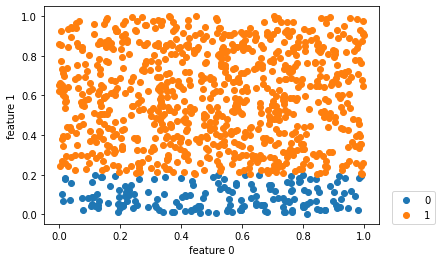

In [85]:
arr1 = plt.scatter(D1[D1[2]==0][0], D1[D1[2]==0][1])
arr2 = plt.scatter(D1[D1[2]==1][0], D1[D1[2]==1][1])
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))

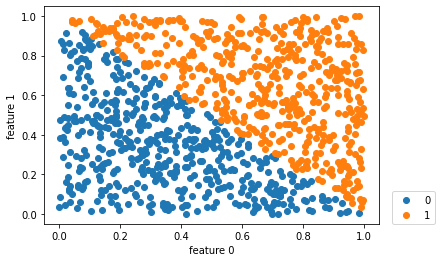

In [86]:
arr1 = plt.scatter(D2[D2[2]==0][0], D2[D2[2]==0][1])
arr2 = plt.scatter(D2[D2[2]==1][0], D2[D2[2]==1][1])
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))


##2.7 Learning curve

In [106]:
Dbig = pd.read_csv('data/Dbig.txt', header = None, sep=" ")

In [107]:
Dbig_shuffled = Dbig.sample(frac=1, random_state=42).reset_index().drop(['index'], axis = 1)

In [108]:
Dbig_train = Dbig_shuffled[:8192]
Dbig_test = Dbig_shuffled[8192:]

In [112]:
sizes = [32, 128, 512, 2048, 8192]
D_sizes = []
for s in sizes:
    df_size = Dbig_train[:s]
    D_sizes.append(df_size)

In [113]:
len(Dbig_train)

8192

In [114]:
type(D_sizes[0])

pandas.core.frame.DataFrame

In [237]:
trees = []
for D in tqdm(D_sizes):
    trees.append(decision_tree(D))

  0%|          | 0/5 [00:00<?, ?it/s]

In [238]:
pickle.dump(trees, open('trees_bigv2.pkl', 'wb'))

In [154]:
def num_elements(x):
    if isinstance(x, dict):
        return sum([num_elements(_x) for _x in x.values()])
    else: return None

In [250]:
trees[0]

{'c': -0.366728,
 'col': 1,
 'best_gain': 0.21059247315589413,
 'best_entropy': 1,
 'left': {'c': -0.956772,
  'col': 0,
  'best_gain': -1000,
  'best_entropy': 0,
  'left': {'pred': 1},
  'right': {'pred': 1}},
 'right': {'c': 1.123617,
  'col': 1,
  'best_gain': 0.3063165949447213,
  'best_entropy': 1,
  'left': {'c': 1.152086,
   'col': 0,
   'best_gain': 0.4630221741820373,
   'best_entropy': 1,
   'left': {'c': -0.803224,
    'col': 0,
    'best_gain': 0.2373974097831018,
    'best_entropy': 0,
    'left': {'pred': 1},
    'right': {'pred': 0}},
   'right': {'c': 1.350004,
    'col': 0,
    'best_gain': -1000,
    'best_entropy': 0,
    'left': {'pred': 1},
    'right': {'pred': 1}}},
  'right': {'c': -0.110102,
   'col': 0,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 1},
   'right': {'pred': 1}}}}

In [251]:
trees[1]

{'c': -0.477942,
 'col': 1,
 'best_gain': 0.26300621727816265,
 'best_entropy': 1,
 'left': {'c': -0.89981,
  'col': 1,
  'best_gain': 0.044515876405580135,
  'best_entropy': 1,
  'left': {'c': -1.195601,
   'col': 0,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 1},
   'right': {'pred': 1}},
  'right': {'c': -0.834281,
   'col': 1,
   'best_gain': 0.11301347743389945,
   'best_entropy': 0,
   'left': {'pred': 0},
   'right': {'pred': 1}}},
 'right': {'c': -1.095619,
  'col': 0,
  'best_gain': 0.22558148488452057,
  'best_entropy': 1,
  'left': {'c': -1.487123,
   'col': 0,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 1},
   'right': {'pred': 1}},
  'right': {'c': 1.123617,
   'col': 1,
   'best_gain': 0.31272109703107,
   'best_entropy': 1,
   'left': {'c': 1.152086,
    'col': 0,
    'best_gain': 0.4013397944512779,
    'best_entropy': 1,
    'left': {'c': -0.383536,
     'col': 1,
     'best_gain': 0.1775217087282786,
     'best_entropy': 1,
  

In [252]:
trees[2]

{'c': -0.70793,
 'col': 1,
 'best_gain': 0.22553998686596355,
 'best_entropy': 1,
 'left': {'c': -0.89981,
  'col': 1,
  'best_gain': 0.053350913568971634,
  'best_entropy': 1,
  'left': {'c': -1.473025,
   'col': 0,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 1},
   'right': {'pred': 1}},
  'right': {'c': 0.199614,
   'col': 0,
   'best_gain': 0.10685177037965676,
   'best_entropy': 1,
   'left': {'c': -0.043642,
    'col': 0,
    'best_gain': 0.5414460711655218,
    'best_entropy': 0,
    'left': {'pred': 1},
    'right': {'pred': 0}},
   'right': {'c': 0.264907,
    'col': 0,
    'best_gain': -1000,
    'best_entropy': 0,
    'left': {'pred': 1},
    'right': {'pred': 1}}}},
 'right': {'c': -1.095619,
  'col': 0,
  'best_gain': 0.21826357908365046,
  'best_entropy': 1,
  'left': {'c': -1.490493,
   'col': 0,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 1},
   'right': {'pred': 1}},
  'right': {'c': 0.895582,
   'col': 0,
   'best_gain': 0.211

In [253]:
trees[3]

{'c': -0.710047,
 'col': 1,
 'best_gain': 0.19652934340931905,
 'best_entropy': 1,
 'left': {'c': -0.925942,
  'col': 1,
  'best_gain': 0.05078711000836372,
  'best_entropy': 1,
  'left': {'c': -1.493254,
   'col': 0,
   'best_gain': -1000,
   'best_entropy': 0,
   'left': {'pred': 1},
   'right': {'pred': 1}},
  'right': {'c': -0.208334,
   'col': 0,
   'best_gain': 0.09071941541887635,
   'best_entropy': 1,
   'left': {'c': -1.491724,
    'col': 0,
    'best_gain': -1000,
    'best_entropy': 0,
    'left': {'pred': 1},
    'right': {'pred': 1}},
   'right': {'c': 0.355629,
    'col': 0,
    'best_gain': 0.40280756919094185,
    'best_entropy': 1,
    'left': {'c': 0.183454,
     'col': 0,
     'best_gain': 0.2198664546884902,
     'best_entropy': 1,
     'left': {'c': -0.090903,
      'col': 0,
      'best_gain': 0.3212122601251458,
      'best_entropy': 1,
      'left': {'c': -0.855832,
       'col': 1,
       'best_gain': 0.4591479170272448,
       'best_entropy': 0,
       'left':

In [159]:
trees[4]

{'c': -0.711619,
 'col': 1,
 'best_gain': 0.18256245574012053,
 'best_entropy': 1,
 'left': {'c': -0.92622,
  'col': 1,
  'best_gain': 0.06759757571597538,
  'best_entropy': 1,
  'left': {'c': -0.954986,
   'col': 1,
   'best_gain': 0.0026409756011454896,
   'best_entropy': 1,
   'left': {'c': -1.49888,
    'col': 0,
    'best_gain': -1000,
    'best_entropy': 0,
    'left': {'pred': 1},
    'right': {'pred': 1}},
   'right': {'c': -0.954911,
    'col': 1,
    'best_gain': 0.012126043782665977,
    'best_entropy': 0,
    'left': {'pred': 0},
    'right': {'pred': 1}}},
  'right': {'c': 0.311391,
   'col': 0,
   'best_gain': 0.1141309455366335,
   'best_entropy': 1,
   'left': {'c': -0.218513,
    'col': 0,
    'best_gain': 0.4844510287136163,
    'best_entropy': 1,
    'left': {'c': -0.339007,
     'col': 0,
     'best_gain': 0.03162194400184211,
     'best_entropy': 1,
     'left': {'c': -1.497724,
      'col': 0,
      'best_gain': -1000,
      'best_entropy': 0,
      'left': {'pred

In [239]:
def predict_test(test, tree):
    preds = []
    for ind, t in test.iterrows():
        x = [t[0], t[1]]
        preds.append(predict(tree, x))
    return preds

In [240]:
def predict(tree, x):
    node = tree
    #print(node)
    #print(node['left'])
    while 'pred' not in node:
        col = node['col']
        c = node['c']
        #print(x, c, col)
        if x[col] <= c:
            node = node['left']
            #print('left', node)
        else:
            try:
                node = node['right']
            except:
                return 1
    return node['pred']

In [241]:
preds_trees = []
for t in trees:
    preds_trees.append(predict_test(Dbig_test, t))

In [243]:
mean_squared_error(Dbig_test[2], preds_trees[0])

0.13440265486725664

In [244]:
mean_squared_error(Dbig_test[2], preds_trees[1])

0.12057522123893805

In [245]:
mean_squared_error(Dbig_test[2], preds_trees[2])

0.04092920353982301

In [246]:
mean_squared_error(Dbig_test[2], preds_trees[3])

0.024889380530973452

In [247]:
mean_squared_error(Dbig_test[2], preds_trees[4])

0.019358407079646017

In [248]:
# n vs error
df_n_error = pd.read_excel('count_nodes.xlsx')

Text(0, 0.5, 'MSE')

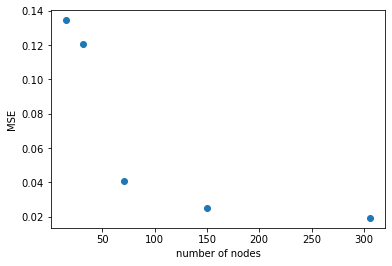

In [249]:
# (1)
plt.scatter(df_n_error['total_nodes'], df_n_error['mse'])
plt.xlabel('number of nodes')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

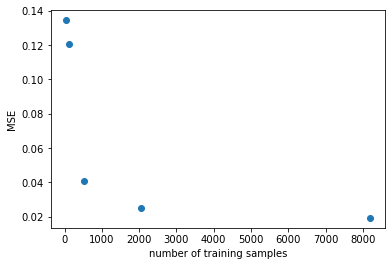

In [254]:
# (2)
plt.scatter(df_n_error['n'], df_n_error['mse'])
plt.xlabel('number of training samples')
plt.ylabel('MSE')

In [167]:
df = D_sizes[0]

In [169]:
df[df[2]==0]

,0,1,2
1,-0.061844,0.093950,0
3,-0.045501,0.753653,0
5,0.431377,0.571630,0
8,0.439718,0.130477,0
11,0.756752,0.726262,0
13,0.231499,1.010202,0
15,0.339906,0.894570,0
21,-0.803224,-0.143545,0
22,-0.075709,0.229840,0
28,0.507855,0.837035,0


In [200]:
# generate dataset

# define the x and y scale
x1grid = np.arange(-1.5, 1.5, 0.001)
x2grid = np.arange(-1.5, 1.5, 0.001)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
df_grid = pd.DataFrame(grid)


In [ ]:
# predict using model
preds = []
preds.append(predict_test(df_grid, trees[0]))

df_grid[2] = preds[0]

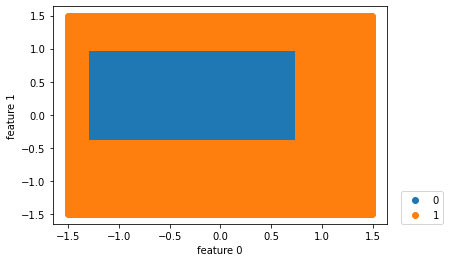

In [192]:
# (3)
# first tree
df = df_grid
arr1 = plt.scatter(df[df[2] == 0][0], df[df[2] == 0][1])
arr2 = plt.scatter(df[df[2] == 1][0], df[df[2] == 1][1])

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))

In [193]:
# (3)
# second tree
# predict using model
preds = []
preds.append(predict_test(df_grid, trees[1]))

df_grid['tree2_preds'] = preds[0]

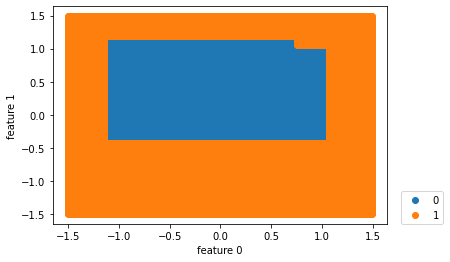

In [195]:

df = df_grid
pred_col = 'tree2_preds'
plt.scatter(df[df[pred_col] == 0][0], df[df[pred_col] == 0][1])
plt.scatter(df[df[pred_col] == 1][0], df[df[pred_col] == 1][1])

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))

In [196]:
# (3)
# third tree
# predict using model
preds = []
preds.append(predict_test(df_grid, trees[2]))

df_grid['tree3_preds'] = preds[0]

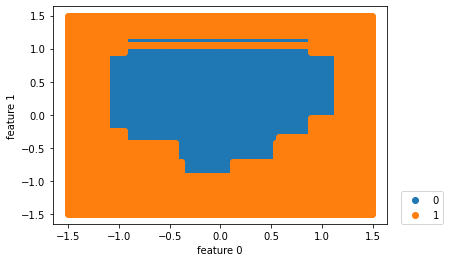

In [197]:
# (3)
# third tree
df = df_grid
pred_col = 'tree3_preds'
plt.scatter(df[df[pred_col] == 0][0], df[df[pred_col] == 0][1])
plt.scatter(df[df[pred_col] == 1][0], df[df[pred_col] == 1][1])

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))

In [202]:
# (3)
# fourth tree
# predict using model
preds = []
preds.append(predict_test(df_grid, trees[3]))

df_grid['tree4_preds'] = preds[0]

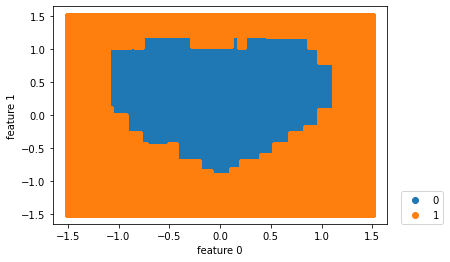

In [203]:
# (3)
# fourth tree

df = df_grid
pred_col = 'tree4_preds'
plt.scatter(df[df[pred_col] == 0][0], df[df[pred_col] == 0][1])
plt.scatter(df[df[pred_col] == 1][0], df[df[pred_col] == 1][1])

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))

In [ ]:
# (3)
# fifth tree
# predict using model
preds = []
preds.append(predict_test(df_grid, trees[4]))

df_grid['tree5_preds'] = preds[0]

In [ ]:
# (3)
# fifth tree

df = df_grid
pred_col = 'tree5_preds'
plt.scatter(df[df[pred_col] == 0][0], df[df[pred_col] == 0][1], s=0.1)
plt.scatter(df[df[pred_col] == 1][0], df[df[pred_col] == 1][1], s=0.1)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))

In [209]:
len(preds[0])

9000000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


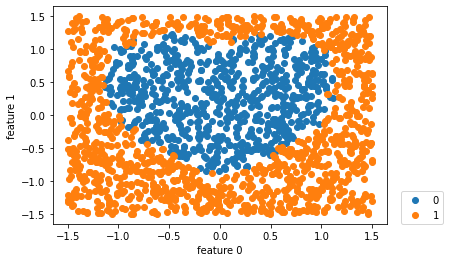

In [214]:
df = Dbig_test
pred_col = 'preds4'
df[pred_col] = preds_trees[4]
plt.scatter(df[df[pred_col] == 0][0], df[df[pred_col] == 0][1])
plt.scatter(df[df[pred_col] == 1][0], df[df[pred_col] == 1][1])

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend([arr1, arr2], [0,1], loc=(1.04,0))

In [43]:
import pickle

In [46]:
pickle.dump(trees, open('2_7trees.pkl', 'wb'))

In [52]:
trees[0]

{'best_entropy': 1,
 'best_gain': 0.21059247315589413,
 'c': -0.419392,
 'col': 1,
 'left': {'best_entropy': 0,
  'best_gain': -1000,
  'c': 0,
  'col': 0,
  'left': 1,
  'right': 1},
 'right': {'best_entropy': 1,
  'best_gain': 0.3063165949447213,
  'c': 1.010202,
  'col': 1,
  'left': {'best_entropy': 1,
   'best_gain': 0.4630221741820373,
   'c': 0.7567520000000001,
   'col': 0,
   'left': {'best_entropy': 0,
    'best_gain': 0.2373974097831018,
    'c': -1.321424,
    'col': 0,
    'left': 1,
    'right': 0},
   'right': {'best_entropy': 0,
    'best_gain': -1000,
    'c': 0,
    'col': 0,
    'left': 1,
    'right': 1}},
  'right': {'best_entropy': 0,
   'best_gain': -1000,
   'c': 0,
   'col': 0,
   'left': 1,
   'right': 1}}}

#3 sklearn

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [34]:
results = []
for D in D_sizes:
  clf = DecisionTreeClassifier()
  clf.fit(D[[0,1]], D[2])
  preds = clf.predict(Dbig_test[[0,1]])

  test_err = mean_squared_error(Dbig_test[2],preds)
  nodes = clf.tree_.node_count
  results.append([len(D), nodes,  test_err])

In [35]:
df_results = pd.DataFrame(results, columns = ['n', 'nodes', 'err'])

In [36]:
df_results

,n,nodes,err
0,32,9,0.101770
1,128,21,0.107301
2,512,59,0.034845
3,2048,105,0.021571
4,8192,229,0.016593


Text(0, 0.5, 'test error rate')

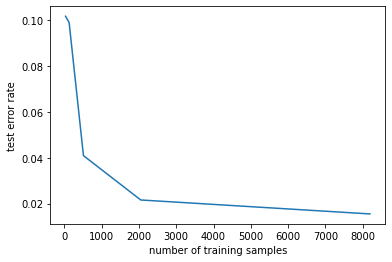

In [23]:
plt.plot(df_results['n'], df_results['err'])
plt.xlabel('number of training samples')
plt.ylabel('test error rate')

#4 Lagrange

pseudocode https://www.codesansar.com/numerical-methods/lagrange-interpolation-method-pseudocode.htm

In [12]:
from scipy.interpolate import lagrange
import numpy.polynomial.polynomial as poly
from sklearn.metrics import mean_squared_error

In [4]:
# [a,b] = [0,1)
x = np.random.rand(100)
y = np.sin(x)

In [6]:
def lagrange_interpolation(x,y, xp):
  yp = 0 #initialize
  n = len(x)
  for i in range(n):
    p = 1
    for j in range(n):
      if i != j:
        p = p*(xp - x[j])/(x[i] - x[j])
    yp = yp + p*y[i]
  return yp

In [7]:
preds = lagrange_interpolation(x,y,x)

In [13]:
# train error
mean_squared_error(y, preds)

0.0

In [14]:
x_test = np.random.rand(100)
y_test = np.sin(x_test)

In [15]:
preds_test = lagrange_interpolation(x,y, x_test)

In [17]:
mean_squared_error(preds_test, y_test)

3.810675809007116e+35

In [18]:
noise_001 = np.random.normal(scale = 0.01, size = 100)
x_noise_001 = x_test + noise_001
y_noise_001 = np.sin(x_noise_001)

preds_test_001 = lagrange_interpolation(x,y, x_noise_001)
print(mean_squared_error(preds_test_001, y_noise_001))

1.5182103698898465e+37


In [26]:
noise_01 = np.random.normal(scale = 0.1, size = 100)
x_noise_01 = x_test + noise_01
y_noise_01 = np.sin(x_noise_01)

preds_test_01 = lagrange_interpolation(x,y, x_noise_01)
print(mean_squared_error(preds_test_01, y_noise_01))

5.191670669931205e+71


In [21]:
noise_1 = np.random.normal(scale = 1, size = 100)
x_noise_1 = x_test + noise_1
y_noise_1 = np.sin(x_noise_1)

preds_test_1 = lagrange_interpolation(x,y, x_noise_1)
print(mean_squared_error(preds_test_1,y_noise_1))

6.479323531959797e+197


I observe that the error increases as the standard deviation increases for the noise. 